 # Librerias

In [ ]:
# 1. Librerias

#### CODIGO


! pip install pennylane
! pip install qutip
#! pip install pennylane-sf --upgrade
#! pip install PennyLane-Lightning

import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from qutip import Bloch
import qutip

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 19.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


# Funciones

In [ ]:
"""# 2. Funciones propias"""

def fidelity(state0, state1):
  F  = qml.math.fidelity(state0, state1)
  return F

# Make a dataset of points inside and outside of a circle
def circle(samples, center=[0.0, 0.0], radius=np.sqrt(2 / np.pi)):
    """
    Generates a dataset of points with 1/0 labels inside a given radius.

    Args:
        samples (int): number of samples to generate
        center (tuple): center of the circle
        radius (float: radius of the circle

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0
        if np.linalg.norm(x - center) < radius:
            y = 1
        Xvals.append(x)
        yvals.append(y)
    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

# Commented out IPython magic to ensure Python compatibility.
def make_IRIS(n_comp):
  # Cargar el conjunto de datos Iris
  iris = load_iris()
  # Acceder a las características y las etiquetas
  X = iris.data  # Características
  # Crear una instancia de PCA y especificar el número de componentes deseados (2 en este caso)
  pca = PCA(n_components=n_comp, random_state=None)
  # Aplicar PCA a las características
  X_pca = pca.fit(X).transform(X)
  y = iris.target  # Etiquetas
  # Percentage of variance explained for each components
  print(
      "explained variance ratio (first two components): %s"
#       % str(pca.explained_variance_ratio_)
  )
  return X_pca, y

def circle_v2(samples, centers=[[0.0, 0.0], [0.0, 0.0]], radii=[np.sqrt(0.8),np.sqrt(0.8 - 2/np.pi)]):
    """
    Generates a dataset of points with three class labels based on two radii.

    Args:
        samples (int): number of samples to generate
        centers (list of tuples): centers of the circles
        radii (list of floats): radii of the circles

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0

        for j, center in enumerate(centers):
            if np.linalg.norm(x - center) < radii[j]:
                y = j + 1

        Xvals.append(x)
        yvals.append(y)

    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

def make_IRIS_v2(n_comp, n_classes):
    # Cargar el conjunto de datos Iris
    iris = load_iris()
    # Acceder a las características y las etiquetas
    X = iris.data  # Características
    # Crear una instancia de PCA y especificar el número de componentes deseados
    pca = PCA(n_components=n_comp, random_state=None)
    # Aplicar PCA a las características
    X_pca = pca.fit_transform(X)
    y = iris.target  # Etiquetas
    if n_classes == 1:
        # Filtrar muestras y etiquetas de una clase específica
        class_index = 0  # Índice de la clase deseada
        mask = (y == class_index)
        X_pca = X_pca[mask]
        y = y[mask]
        return X_pca, y
    elif n_classes == 2:
        # Filtrar muestras y etiquetas de dos clases específicas
        class_indices = [0, 1]  # Índices de las clases deseadas
        mask = np.isin(y, class_indices)
        X_pca = X_pca[mask]
        y = y[mask]
        return X_pca, y
    else:
      return X_pca,y

def representatives(classes, qubits_lab):
    """
    This function creates the label states for the classification task
    INPUT:
        -classes: number of classes of our problem
        -qubits_lab: how many qubits will store the labels
    OUTPUT:
        -reprs: the label states
    """
    reprs = np.zeros((classes, 2**qubits_lab), dtype = 'complex', requires_grad=False)
    if qubits_lab == 1:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / 2, np.sqrt(3) / 2])
            reprs[2] = np.array([1 / 2, -np.sqrt(3) / 2])
        if classes == 4:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / np.sqrt(3), np.sqrt(2 / 3)])
            reprs[2] = np.array([1 / np.sqrt(3), np.exp(1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
            reprs[3] = np.array([1 / np.sqrt(3), np.exp(-1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
        if classes == 6:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
            reprs[2] = 1 / np.sqrt(2) * np.array([1, 1])
            reprs[3] = 1 / np.sqrt(2) * np.array([1, -1])
            reprs[4] = 1 / np.sqrt(2) * np.array([1, 1j])
            reprs[5] = 1 / np.sqrt(2) * np.array([1, -1j])

    if qubits_lab == 2:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 0, 0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
        if classes == 4:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
            reprs[3] = np.array([0, 0, 0, 1])

    return reprs

def representatives_to_entropy(classes, qubits_lab):
    """
    This function creates the label states for the classification task
    INPUT:
        -classes: number of classes of our problem
        -qubits_lab: how many qubits will store the labels
    OUTPUT:
        -reprs: the label states
    """
    reprs = np.zeros((classes, 2**qubits_lab), dtype = 'complex', requires_grad=False)
    if qubits_lab == 1:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / 2, np.sqrt(3) / 2])
            reprs[2] = np.array([1 / 2, -np.sqrt(3) / 2])
        if classes == 4:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / np.sqrt(3), np.sqrt(2 / 3)])
            reprs[2] = np.array([1 / np.sqrt(3), np.exp(1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
            reprs[3] = np.array([1 / np.sqrt(3), np.exp(-1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
        if classes == 6:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
            reprs[2] = 1 / np.sqrt(2) * np.array([1, 1])
            reprs[3] = 1 / np.sqrt(2) * np.array([1, -1])
            reprs[4] = 1 / np.sqrt(2) * np.array([1, 1j])
            reprs[5] = 1 / np.sqrt(2) * np.array([1, -1j])

    if qubits_lab == 2:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 0, 0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
        if classes == 4:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
            reprs[3] = np.array([0, 0, 0, 1])

    return reprs

def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

def to_cartesian(polar):
    r = polar[0]
    θ = polar[1]
    ϕ = polar[2]
    x = r * np.sin(θ) * np.cos(ϕ)
    y = r * np.sin(θ) * np.sin(ϕ)
    z = r * np.cos(θ)
    return [x, y, z]

def visualization_1_qubit(f_q_circuit, X, Y, params, ax, angles=[-90,180], sz=1, bias=None, entanglement=False):
  nf, nc = X.shape
  clases = list(set(Y))
  if nc == 1:
    X = np.hstack((X, np.zeros((nf, 2), requires_grad=False)))
  elif nc == 2:
    X = np.hstack((X, np.zeros((nf, 1), requires_grad=False)))
  dict_coord = {}
  # Agregar datos al diccionario
  def agregar_dato(key, dato):
      dict_coord.setdefault(key, []).append(dato)
  for i in range(len(X)):
    state = f_q_circuit(params, X[i], bias, entanglement)
    alpha, beta = state
    my_state = [complex(alpha), complex(beta)]
    polar = to_spherical(my_state)
    x, y, z = to_cartesian(polar)
    agregar_dato(f'cl_{int(Y[i])}_x', x)
    agregar_dato(f'cl_{int(Y[i])}_y', y)
    agregar_dato(f'cl_{int(Y[i])}_z', z)
  bloch_sphere = Bloch(view=(angles))
  bloch_sphere.axes = ax
  bloch_sphere.point_size = sz
  color_to_cycle = ["#FF0000", "#0000FF", "#006400"]
  my_colors = [ color_to_cycle[cl] for cl in clases ]
  bloch_sphere.point_color = my_colors
  for cl in clases:
    X_key = f'cl_{cl}_x'
    Y_key = f'cl_{cl}_y'
    Z_key = f'cl_{cl}_z'
    pnts = [dict_coord[X_key], dict_coord[Y_key], dict_coord[Z_key]]
    bloch_sphere.add_points(pnts)
    bloch_sphere.render()
  bloch_sphere.show()

# Visualizacion Train, test, true
def plot_data(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

# Visualizacion Train, test, true
def plot_data_v2(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    green = y == 2
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.scatter(x[green, 0], x[green, 1], c="green", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)

def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data
    Args:
        inputs (array[float]): input data
        targets (array[float]): targets
    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]

def test(model, params, x, y, state_labels=None, bias=None, entanglement = False):
  """
  Tests on a given set of data. This function predicts in function of max fidelity.
  Args:
      params (array[float]): array of parameters
      x (array[float]): 2-d array of input vectors
      y (array[float]): 1-d array of targets
      state_labels (array[float]): 1-d array of state representations for labels
  Returns:
      predicted (array([int]): predicted labels for test data
      output_states (array[float]): output quantum states from the circuit
  """
  fidelity_values = []
  dm_labels = [s for s in state_labels]
  #print(f'len labels = {len(dm_labels)}')
  predicted = []
  for i in range(len(x)):
    #fidel_function = lambda y: qcircuit(params, x[i], y)
    fidelities = []
    for dm in dm_labels:
      state_output = model(params, x[i], bias=bias, entanglement = entanglement)
      # fidelity_cost(model, params, x, y, state_labels=None)
      f = fidelity(qml.math.dm_from_state_vector(state_output), qml.math.dm_from_state_vector(dm))
      fidelities.append(f)
    best_fidel = np.argmax(fidelities)
    #print(fidelities, best_fidel, y[i])
    predicted.append(best_fidel)
    fidelity_values.append(fidelities)
  return np.array(predicted), np.array(fidelity_values)

# Modelo DRU 1 qubit

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev, interface="autograd")
def qcircuit_2_qubit(params, x, bias=None, entanglement=False):
    '''A variational quantum circuit representing the Universal classifier.
    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
    Returns:
        float: qml state
    '''
    for i,p in enumerate(params):
      arg = np.multiply(p,x) + bias[i]
      arg1, arg2, arg3 = arg
      qml.Rot(arg3,arg1,arg2 , wires=0) # RZ * RY * RZ -> data
      qml.Snapshot(f"ket_{i}")
    return qml.state()

In [ ]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev, interface="autograd")
def qcircuit_2_qubit_entanglement(params, x, bias = None, entanglement = False):
    """A variational quantum circuit representing the Universal classifier.
    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
    Returns:
        float: qml state
    """
    n_layer = len(params) // 2
    print(f"N_layers = {n_layer}")
    for i in range(n_layer):
      print(f"Iteracion = {n_layer}")
      arg_1 = np.multiply(params[i],x) + bias[i]
      arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
      qml.Rot(*arg_1 , wires=0) # RZ * RY * RZ -> data
      qml.Rot(*arg_2 , wires=1) # RZ * RY * RZ -> data
      qml.Snapshot(f"ket_2_qubits_{i}")
      if entanglement == True:
        qml.CZ(wires=[0,1])
        qml.Snapshot(f"ket_2_qubits_entanglement{i}")
    return qml.state()

In [ ]:
dev = qml.device("default.qubit", wires=4)
@qml.qnode(dev, interface="autograd")
def qcircuit_4_qubit_entanglement(params, x, bias = None, entanglement = False):
    """A variational quantum circuit representing the Universal classifier.
    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
    Returns:
        float: qml state
    """
    n_layer = len(params) // 4
    #n_entenglaments = 0
    for i in range(n_layer):
      print(f"Contador general {i}")
      arg_1 = np.multiply(params[i],x) + bias[i]
      arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
      arg_3 = np.multiply(params[i + 2*n_layer],x) + bias[i + 2*n_layer]
      arg_4 = np.multiply(params[i + 3*n_layer],x) + bias[i + 3*n_layer]
      qml.Rot(*arg_1 , wires=0) # RZ * RY * RZ -> data
      qml.Rot(*arg_2 , wires=1) # RZ * RY * RZ -> data
      qml.Rot(*arg_3 , wires=2) # RZ * RY * RZ -> data
      qml.Rot(*arg_4 , wires=3) # RZ * RY * RZ -> data
      qml.Snapshot(f"ket_4_qubits_{i}")
      if entanglement == True:
        if i % 2 == 0 and i < n_layer-1:
          print(f"Entro par en {i}")
          # par:
          qml.CZ(wires=[0,1])
          qml.CZ(wires=[2,3])
          qml.Snapshot(f"ket_4_qubits_entanglement_par{i}")
          #n_entenglaments += 1
        elif i < n_layer-1:
          print(f"Entro impar en {i}")
          # impar:
          qml.CZ(wires=[1,2])
          qml.CZ(wires=[0,3])
          qml.Snapshot(f"ket_4_qubits_entanglement_impar{i}")
          #n_entenglaments += 1
    #verb = 1
    #if verb == 1:
    #  print(f"n_entenglaments = {n_entenglaments}")
    #  verb = 0
    return qml.state()

## Inspeccion de estados

### Prueba de 1 qubit

In [ ]:
num_layers = 10
np.random.seed(42)
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
print(params)
bias = np.random.uniform(size=(num_layers, 3), requires_grad=True)
#x = [0.1, 0.5, 1]
x = [-0.18962247, -0.68028676, -0.30642056]
diccionario_estados = qml.snapshots(qcircuit_2_qubit)(params,x,bias)

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]]


In [ ]:
diccionario_estados

{'ket_0': tensor([0.91596724+0.30124645j, 0.26173364-0.04183407j], requires_grad=True),
 'ket_1': tensor([0.67147391-0.39437604j, 0.55770115+0.28733214j], requires_grad=True),
 'ket_2': tensor([0.6108362-0.46871905j, 0.6094426+0.18910659j], requires_grad=True),
 'ket_3': tensor([0.43459178-0.58280103j, 0.65656169+0.20099675j], requires_grad=True),
 'ket_4': tensor([0.1556456 -0.71603006j, 0.45098113+0.50959926j], requires_grad=True),
 'ket_5': tensor([-0.13066033-0.87057631j,  0.32561532+0.34496294j], requires_grad=True),
 'ket_6': tensor([-0.47394593-0.83995381j,  0.06244841+0.25681327j], requires_grad=True),
 'ket_7': tensor([-0.87963452-0.35570274j, -0.30258097-0.09035164j], requires_grad=True),
 'ket_8': tensor([-0.82428797-0.15264754j, -0.47121038-0.27424232j], requires_grad=True),
 'ket_9': tensor([-0.80203003-0.15127624j, -0.51769132-0.25663014j], requires_grad=True),
 'execution_results': tensor([-0.80203003-0.15127624j, -0.51769132-0.25663014j], requires_grad=True)}

### Prueba 2 qubits sin entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]
diccionario_estados = qml.snapshots(qcircuit_2_qubit_entanglement)(params,x,bias)

N_layers = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10


In [ ]:
diccionario_estados

{'ket_2_qubits_0': tensor([0.06365806-0.85551407j, 0.28355029-0.22496133j,
         0.33536087+0.02156228j, 0.0892366 +0.11018138j], requires_grad=True),
 'ket_2_qubits_1': tensor([-0.69405844+0.18345821j,  0.16952466-0.58876338j,
          0.10483124-0.22851157j,  0.12149157+0.17685508j], requires_grad=True),
 'ket_2_qubits_2': tensor([-0.03980794+0.80704828j,  0.08190851-0.43294221j,
         -0.33467325+0.07668091j,  0.18651101-0.01636883j], requires_grad=True),
 'ket_2_qubits_3': tensor([ 0.8396366 -0.20360455j, -0.15215332-0.39441627j,
         -0.15500637+0.19067413j,  0.10236073+0.06308258j], requires_grad=True),
 'ket_2_qubits_4': tensor([0.21890461-0.72561114j, 0.30695801-0.51554257j,
         0.19623407+0.042371j  , 0.14264235+0.07008521j], requires_grad=True),
 'ket_2_qubits_5': tensor([-0.56987174-0.08550329j,  0.30054855-0.67952991j,
         -0.03528636-0.20558j   ,  0.26767745+0.02618367j], requires_grad=True),
 'ket_2_qubits_6': tensor([ 0.07583213+0.60255054j,  0.10257

### Prueba 2 qubits con entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]
diccionario_estados = qml.snapshots(qcircuit_2_qubit_entanglement)(params,x,bias,entanglement = True)

N_layers = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10
Iteracion = 10


In [ ]:
diccionario_estados

{'ket_2_qubits_0': tensor([0.06365806-0.85551407j, 0.28355029-0.22496133j,
         0.33536087+0.02156228j, 0.0892366 +0.11018138j], requires_grad=True),
 'ket_2_qubits_entanglement0': tensor([ 0.06365806-0.85551407j,  0.28355029-0.22496133j,
          0.33536087+0.02156228j, -0.0892366 -0.11018138j], requires_grad=True),
 'ket_2_qubits_1': tensor([-0.72109987+0.17118729j,  0.163099  -0.54827506j,
          0.17545239-0.08085123j,  0.29215671+0.0287588j ], requires_grad=True),
 'ket_2_qubits_entanglement1': tensor([-0.72109987+0.17118729j,  0.163099  -0.54827506j,
          0.17545239-0.08085123j, -0.29215671-0.0287588j ], requires_grad=True),
 'ket_2_qubits_2': tensor([-0.21395787+0.78483764j,  0.22680187-0.229797j  ,
         -0.20704861+0.23573868j,  0.13772829-0.34146042j], requires_grad=True),
 'ket_2_qubits_entanglement2': tensor([-0.21395787+0.78483764j,  0.22680187-0.229797j  ,
         -0.20704861+0.23573868j, -0.13772829+0.34146042j], requires_grad=True),
 'ket_2_qubits_3': t

### Prueba 4 qubits sin entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]
diccionario_estados = qml.snapshots(qcircuit_4_qubit_entanglement)(params,x,bias,entanglement = False)

Contador general 0
Contador general 1
Contador general 2
Contador general 3
Contador general 4


In [ ]:
diccionario_estados

{'ket_4_qubits_0': tensor([-0.72603454-0.12942696j, -0.02542213-0.21304713j,
         -0.16752737-0.26220363j,  0.05880607-0.0688233j ,
         -0.26209673-0.25681165j,  0.04930127-0.09469049j,
          0.00468312-0.15474721j,  0.04347052-0.01179356j,
          0.04783483-0.28490228j,  0.08335159-0.01079796j,
          0.10204621-0.06665522j,  0.02719034+0.02276334j,
          0.09956129-0.10367734j,  0.0372852 +0.01893827j,
          0.06063385+0.0012243j ,  0.00479099+0.01698116j], requires_grad=True),
 'ket_4_qubits_1': tensor([ 0.54775879-0.21682687j, -0.10295219+0.14655426j,
         -0.08101844+0.49620363j, -0.06227682-0.13959088j,
         -0.13506883+0.32630104j, -0.02017358-0.10545242j,
         -0.17988639-0.24182587j,  0.08608248+0.03139773j,
         -0.06325295+0.19637421j, -0.01672245-0.06045183j,
         -0.11615587-0.13232465j,  0.05160625+0.01422085j,
         -0.05818323-0.10913421j,  0.03300564+0.01800996j,
          0.10542334+0.00516608j, -0.02764575+0.01629192j

### Prueba con 4 qubits con entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]
diccionario_estados = qml.snapshots(qcircuit_4_qubit_entanglement)(params,x,bias,entanglement = True)

Contador general 0
Entro par en 0
Contador general 1
Entro impar en 1
Contador general 2
Entro par en 2
Contador general 3
Entro impar en 3
Contador general 4


In [ ]:
diccionario_estados

{'ket_4_qubits_0': tensor([-0.72603454-0.12942696j, -0.02542213-0.21304713j,
         -0.16752737-0.26220363j,  0.05880607-0.0688233j ,
         -0.26209673-0.25681165j,  0.04930127-0.09469049j,
          0.00468312-0.15474721j,  0.04347052-0.01179356j,
          0.04783483-0.28490228j,  0.08335159-0.01079796j,
          0.10204621-0.06665522j,  0.02719034+0.02276334j,
          0.09956129-0.10367734j,  0.0372852 +0.01893827j,
          0.06063385+0.0012243j ,  0.00479099+0.01698116j], requires_grad=True),
 'ket_4_qubits_entanglement_par0': tensor([-0.72603454-0.12942696j, -0.02542213-0.21304713j,
         -0.16752737-0.26220363j, -0.05880607+0.0688233j ,
         -0.26209673-0.25681165j,  0.04930127-0.09469049j,
          0.00468312-0.15474721j, -0.04347052+0.01179356j,
          0.04783483-0.28490228j,  0.08335159-0.01079796j,
          0.10204621-0.06665522j, -0.02719034-0.02276334j,
         -0.09956129+0.10367734j, -0.0372852 -0.01893827j,
         -0.06063385-0.0012243j ,  0.0047

In [ ]:
ketf = diccionario_estados['execution_results']
np.round(ketf,3)

tensor([-0.531+0.056j, -0.025-0.124j, -0.12 -0.258j,  0.   -0.05j ,
        -0.129-0.419j,  0.231+0.182j,  0.151+0.128j,  0.219-0.188j,
        -0.083-0.066j,  0.134+0.192j, -0.001+0.102j,  0.231+0.134j,
         0.1  -0.024j,  0.099+0.09j ,  0.147-0.133j, -0.01 +0.011j], requires_grad=True)

# CLASE DEFINITIVA


In [ ]:
from collections import defaultdict
mi_diccionario = defaultdict(list)

In [ ]:
from qutip import *
import matplotlib as mpl
from matplotlib import cm

In [ ]:
# Pulso cosenoidal

def pulse_x_cos(t, args):
    t_init = args["t_init"]
    t_final = args["t_final"]
    w = args["w"]
    pulse = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
    return np.cos(w*t)*pulse

# Pulsos para la clase

def pulse_x(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

def pulse_z(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

def pulse_x_with_noise(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  std_noise = args["std_noise"]
  noise = np.random.normal(loc=0, scale=std_noise, size = len(t))
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0) + noise
  return y

def pulse_z_with_noise(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  std_noise = args["std_noise"]
  noise = np.random.normal(loc=0, scale=std_noise, size = len(t))
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0) + noise
  return y

In [ ]:
def traducir_a_positivo(angulo):
    while angulo < 0:
        angulo += 2 * np.pi
    return angulo

In [ ]:
global_B0 = False

In [ ]:
class Quantum_Spin_Proces:
    def __init__(self, h = 1, gir = 1.760e11, B0 = 10e-3, nf = 1, N_qubits = 1,J = 1, tf_noise = False,
                 noise_std = 0.01, B1_offset = 0, n_points_pulse_Ri = 100,
                 n_points_pulse_2Qbits = 100, n_swap = 1):
        #self.delt_t = delt_t
        #self.ω_x = (2*np.pi*n_f)/self.delt_t
        #self.g_e = g_e
        #self.u_b = u_b


        self.gir = gir
        self.B0 = B0
        self.Dt = -7

        self.h = h
        self.nf = nf
        self.N_qubits = N_qubits
        self.J = J
        self.tf_noise = tf_noise
        self.noise_std = noise_std
        self.B1_offset = B1_offset
        self.n_points_pulse_Ri = n_points_pulse_Ri
        self.n_points_pulse_2Qbits = n_points_pulse_2Qbits
        self.n_swap = n_swap
        self.global_time = 0
        self.dict_states = {}
        self.pulse_type = defaultdict(list)

    def Rz(self, alpha, ket_0, q_obj = 0, tf_expect = True):
      # Estados iniciales y qubit objetivo:
      self.q_obj = q_obj
      self.ket_0 = ket_0
      # parametros de compuerta:
      self.ω_x = 0
      self.ω_z = self.gir * self.B0
      alpha  = traducir_a_positivo(alpha)
      self.delt_t = (alpha)/self.ω_z
      self.B1 = 0
      self.O_x = self.gir*(self.B1/2)
      # solucion:
      out = self.Hamiltonian_solve(tf_expect)
      return out

    def Rx(self, alpha, ket_0, q_obj = 0, tf_expect = True):
      # Estados iniciales y qubit objetivo:
      self.q_obj = q_obj
      self.ket_0 = ket_0
      # parametros de compuerta:
      self.ω_x = self.gir * self.B0
      self.ω_z = self.gir * self.B0
      self.delt_t = (2*np.pi*self.nf)/self.ω_x
      self.B1 = (alpha * 2)/(self.gir * self.delt_t)
      self.O_x = self.gir*(self.B1/2)
      # solucion:
      out = self.Hamiltonian_solve(tf_expect)
      return out

    def Ry(self, alpha, ket_0, q_obj = 0, tf_expect = True):

      out_1 = self.Rx(np.pi/2, ket_0, q_obj=q_obj, tf_expect = False)
      end_state_1 = out_1.states[-1]
      out_2 = self.Rz(alpha, end_state_1,q_obj=q_obj, tf_expect = False)
      end_state_2 = out_2.states[-1]
      out_3 = self.Rx(-np.pi/2, end_state_2,q_obj=q_obj, tf_expect = False)
      end_state_3 = out_3.states[-1]
      if tf_expect == True:
        out_1_exp = self.Rx(np.pi/2, ket_0, q_obj=q_obj, tf_expect = True)
        out_2_exp = self.Rz(alpha, end_state_1,q_obj=q_obj, tf_expect = True)
        out_3_exp = self.Rx(-np.pi/2, end_state_2,q_obj=q_obj, tf_expect = True)
        out = [out_1_exp, out_2_exp, out_3_exp]
      else:
        out = out_3
      return out

    def H(self, ket_0, alpha = np.pi/2, q_obj = 0, tf_expect = True):
      out_1 = self.Rz(np.pi/2, ket_0, q_obj=q_obj, tf_expect = False)
      end_state_1 = out_1.states[-1]
      out_2 = self.Rx(alpha, end_state_1,q_obj=q_obj, tf_expect = False)
      end_state_2 = out_2.states[-1]
      out_3 = self.Rz(np.pi/2, end_state_2,q_obj=q_obj, tf_expect = False)
      end_state_3 = out_3.states[-1]
      if tf_expect == True:
        out_1_exp = self.Rz(np.pi/2, ket_0, q_obj=q_obj, tf_expect = True)
        out_2_exp = self.Rx(alpha, end_state_1,q_obj=q_obj, tf_expect = True)
        out_3_exp = self.Rz(np.pi/2, end_state_2,q_obj=q_obj, tf_expect = True)
        out = [out_1_exp, out_2_exp, out_3_exp]
      else:
        out = out_3
      return out

    def SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True):
      self.q_obj = q_obj
      self.ket_0 = ket_0
      self.Dt = np.pi/(self.J*self.n_swap)
      self.measure = measure_op
      self.qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      self.out = self.Hamiltonian_solve_excharge(tf_expectt)
      return self.out

    def sqrt_SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True):
      self.q_obj = q_obj
      self.ket_0 = ket_0
      self.Dt = (np.pi/(2*self.J*self.n_swap))
      self.measure = measure_op
      self.qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      self.out = self.Hamiltonian_solve_excharge(tf_expectt)
      return self.out

    def CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
      self.q_obj = q_obj
      q_control , q_target = q_obj
      state_1 = self.Ry(np.pi/2, ket_0, q_obj = q_target, tf_expect = False).states[-1]
      state_2 = self.sqrt_SWAP(state_1, [], q_obj = q_obj, tf_expectt = False).states[-1]
      state_3 = self.Rz(np.pi, state_2, q_obj = q_control, tf_expect = False).states[-1]
      state_4 = self.sqrt_SWAP(state_3, [], q_obj= q_obj, tf_expectt = False).states[-1]
      state_5 = self.Rz(-np.pi/2, state_4, q_obj = q_control, tf_expect = False).states[-1]
      state_6 = self.Rz(-np.pi/2, state_5, q_obj = q_target, tf_expect = False).states[-1]
      state_7 = self.Ry(-np.pi/2, state_6, q_obj = q_target, tf_expect = False).states[-1]
      return state_7

    def CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
      self.q_obj = q_obj
      q_control , q_target = q_obj
      state_2 = self.sqrt_SWAP(ket_0, [], q_obj = q_obj, tf_expectt = False).states[-1]
      state_3 = self.Rz(-np.pi, state_2, q_obj = q_control, tf_expect = False).states[-1]
      state_4 = self.sqrt_SWAP(state_3, [], q_obj = q_obj, tf_expectt = False).states[-1]
      state_5 = self.Rz(np.pi/2, state_4, q_obj = q_control, tf_expect = False).states[-1]
      state_6 = self.Rz(-np.pi/2, state_5, q_obj = q_target, tf_expect = False).states[-1]
      return state_6

    def Hamiltonian_solve(self, tf_expect = True):
      # Hamiltonian H0
      h0_constant = - (self.h/2) * (self.ω_x) # + (self.h/2) * (self.ω_z)
      h1_constant =   (self.h/2) * (self.ω_z)
      h2_constant =   (self.h/2) * (self.O_x)
      if self.N_qubits > 1:
        apply_qbit_z = []
        apply_qbit_x = []
        for i in range(self.N_qubits):
          if i == self.q_obj:
            apply_qbit_z.append(sigmaz())
            apply_qbit_x.append(sigmax())
          else:
            apply_qbit_z.append(qeye(2))
            apply_qbit_x.append(qeye(2))
      else:
        apply_qbit_z = [sigmaz()]
        apply_qbit_x = [sigmax()]
      H0 = h0_constant * tensor(*apply_qbit_z)
      H1 = h1_constant * tensor(*apply_qbit_z)
      H2 = h2_constant * tensor(*apply_qbit_x)
      self.args = { "t_init": 0, "t_final": self.delt_t, "std_noise": self.noise_std }
      self.tlist  = np.linspace(0, self.delt_t, self.n_points_pulse_Ri)
      # Hamiltonian
      if self.tf_noise == False:
        H = [H0, [H1, pulse_z], [H2, pulse_x]]
        # Guardar pulso:
        t_actual = self.global_time
        t_final = self.global_time + self.delt_t
        self.pulse_type[self.q_obj].append({
            "Type_pulse": "Unitary",
            "B0": self.B0,
            "B1": self.B1,
            "Delt_t": self.delt_t,
            "t_i": t_actual,
            "t_f": t_final,
            "Noise": ""
        })
        self.global_time += self.delt_t
      else:
        print("Entre con ruido!")
        noise_x = pulse_x_with_noise(self.tlist, self.args)
        S_x = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_x)
        noise_z = pulse_z_with_noise(self.tlist, self.args)
        S_z = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_z)
        H = [H0, [H1, S_z], [H2, S_x]]
        # Guardar pulso
        t_actual = self.global_time
        t_final = self.global_time + self.delt_t
        self.pulse_type[self.q_obj].append(
                         {
                          "Type_pulse": "Unitary",
                          "B0": self.B0,
                          "B1": self.B1,
                          "Delt_t": self.delt_t,
                          "t_i": t_actual,
                          "t_f": t_final,
                          "Noise": {
                              "S_z": S_z,
                              "S_x": S_x
                          }
                        })
        self.global_time += self.delt_t
      if tf_expect:
        if self.N_qubits > 1:
          apply_qbit_e_ops = []
          for i in range(self.N_qubits):
            if i == self.q_obj:
              apply_qbit_e_ops.append(sigmaz())
            else:
              apply_qbit_e_ops.append(qeye(2))
          e_ops = [tensor(*apply_qbit_e_ops)]
        else:
          e_ops = [sigmax(), sigmay(), sigmaz()]
      else:
        e_ops = []
      c_ops = []
      self.output_rwa = mesolve(H, self.ket_0, self.tlist, c_ops, e_ops, self.args)
      return self.output_rwa

    def Hamiltonian_solve_excharge(self, tf_expect = True):
      delt_t = self.Dt
      Si, Sj = self.q_obj
      if self.N_qubits > 1:
        apply_qbit_z = []
        apply_qbit_x = []
        apply_qbit_y = []
        for i in range(self.N_qubits):
          if i == Si or i == Sj:
            apply_qbit_z.append(sigmaz())
            apply_qbit_x.append(sigmax())
            apply_qbit_y.append(sigmay())
          else:
            apply_qbit_z.append(qeye(2))
            apply_qbit_x.append(qeye(2))
            apply_qbit_y.append(qeye(2))

      H = ((self.J * self.h**2)/4)*(tensor(*apply_qbit_x) + tensor(*apply_qbit_y) + tensor(*apply_qbit_z))

      #H = (self.J/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
      qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      h_t = [H, pulse_x]
      self.args = { "t_init": 0, "t_final": delt_t, "std_noise": self.noise_std }
      #self.args = {"t_init":0, "t_final": delt_t, "noise": True}
      c_ops = []
      if tf_expect:
        e_ops = [qobj]
      else:
        e_ops = []
      self.tlist  = np.linspace(0, delt_t, self.n_points_pulse_2Qbits)
      # Save pulses
      t_actual = self.global_time
      t_final = self.global_time + delt_t
      self.pulse_type[f'I_{self.q_obj[0]}-{self.q_obj[1]}'].append(
                         {
                            "Type_pulse": "Two_Qubits",
                            "Q_bits_target":self.q_obj,
                            "J": self.J,
                            "Delt_t": self.Dt,
                            "t_i": t_actual,
                            "t_f": t_final,
                            "Noise": ""
                          })
      self.global_time += self.Dt
      self.output = mesolve(h_t, self.ket_0, self.tlist, c_ops, e_ops, self.args)
      return self.output

    def plot_expect(self, out, ry_tf = False):
      ## create Bloch sphere instance ##
      if ry_tf == False:
        fig = plt.figure(constrained_layout=True)
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        b=Bloch()
        b.axes = ax1
        b.fig = fig
        ## normalize colors to times in tlist ##
        nrm = mpl.colors.Normalize(0, self.delt_t)
        colors = cm.jet(nrm(self.tlist))
        ## add data points from expectation values ##
        b.add_points([out.expect[0],out.expect[1],out.expect[2]],'m')
        ## customize sphere properties ##
        b.point_color=list(colors)
        b.point_marker=['o']
        b.point_size=[8]
        b.view=[-9,11]
        b.zlpos=[1.1,-1.2]
        b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
        ## plot sphere ##
        b.render()
        ## Add color bar ##
        sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
        sm.set_array([])  # You need to set a dummy array for the right scaling
        cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
        cbar.set_label('Time [s]')
        plt.show()
      else:
        fig = plt.figure(constrained_layout=True)
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        b=Bloch()
        b.axes = ax1
        b.fig = fig
        ## normalize colors to times in tlist ##
        nrm = mpl.colors.Normalize(0, self.delt_t)
        colors = cm.jet(nrm(self.tlist))
        ## add data points from expectation values ##
        for i in range(len(out)):
          b.add_points([out[i].expect[0], out[i].expect[1], out[i].expect[2]],'m')
        ## customize sphere properties ##
        b.point_color=list(colors)
        b.point_marker=['o']
        b.point_size=[8]
        b.view=[-9,11]
        b.zlpos=[1.1,-1.2]
        b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
        ## plot sphere ##
        b.render()
        ## Add color bar ##
        sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
        sm.set_array([])  # You need to set a dummy array for the right scaling
        cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
        cbar.set_label('Time [s]')
        plt.show()

    def plot_excharges(self, out, index, ry_tf = False):

      labels_axis = ["X","Y","Z"]
      # Grafica del valor esperado:
      if ry_tf == False:
        plt.figure(figsize=(6, 2))
        # Subplot para el valor esperado
        plt.subplot(1, 1, 1)  # 2 filas, 1 columna, primer subplot
        plt.plot(self.tlist, out.expect[index])
        plt.title(f'Valor Esperado \n Eje {labels_axis[index]}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.grid(True)
      else:
        time = list(self.tlist) + list(self.tlist) + list(self.tlist)
        Ntime = len(time)
        tt = np.linspace(0,3e-9,Ntime)
        y = list(out[0].expect[index]) + list(out[1].expect[index]) + list(out[2].expect[index])
        plt.figure(figsize=(6, 2))
        # Subplot para el valor esperado
        plt.subplot(1, 1, 1)  # 2 filas, 1 columna, primer subplot
        plt.plot(tt, y)
        plt.title(f'Valor Esperado \ Eje {labels_axis[index]}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.grid(True)
      plt.show()
      print("\n")
      # Grafica del pulso:
      if self.tf_noise == False:
        if self.Dt == -7:
          # Subplot para el pulso
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B0 * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
          # Subplot para el pulso
          plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B1 * pulse_x(self.tlist, self.args))
          plt.title('Pulso B1')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
        else:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.J * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)

      else:
        if self.Dt == -7:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B0 * pulse_z_with_noise(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
          # Subplot para el pulso
          plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B1 * pulse_x_with_noise(self.tlist, self.args))
          plt.title('Pulso B1')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
        else:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.J * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
      # Ajustar el espacio entre los subgráficos para evitar solapamiento
      plt.tight_layout()
      # Mostrar el gráfico
      plt.show()

In [ ]:
class CompositeGateProcessor(Quantum_Spin_Proces):
  def __init__(self, nf=4, h=1, gir =1.760e11, B0=10e-3,N_qubits=1, J=1, tf_noise=False,
                 noise_std=0.01, B1_offset=0, n_points_pulse_Ri=100, n_points_pulse_2Qbits=100, n_swap=1,
                ket_dru_0 = basis(2, 0)):  # Puedes añadir nuevos parámetros si es necesario
      super().__init__(h, gir, B0, nf, N_qubits,J, tf_noise,
                 noise_std, B1_offset, n_points_pulse_Ri,
                 n_points_pulse_2Qbits, n_swap)
      self.ket_dru_0 = ket_dru_0

  def qcircuit_DRU_1_Qubit(self, params, x, bias=None, entanglement=False):
    for i,p in enumerate(params):
        arg = np.multiply(p,x) + bias[i]
        arg1, arg2, arg3 = arg
        #print(type(arg1), type(arg2), type(arg3))
        #print(arg1, arg2, arg3)
        self.ket_dru_0 = self.RzRyRz(float(arg3), float(arg1), float(arg2), self.ket_dru_0, tf_expect=False)
        self.dict_states[f"ket_1_qubit_{i}"] = self.ket_dru_0.full()
    return self.ket_dru_0

  def qcircuit_DRU_2_Qubit(self, params, x, bias=None, entanglement=False):
    n_layer = len(params) // 2
    print(f"N_layers = {n_layer}")
    print(f"params_shape = {params.shape}")
    print(f"params_shape = {bias.shape}")
    for i in range(n_layer):
      arg_1 = np.multiply(params[i],x) + bias[i]
      arg_1_1, arg_1_2, arg_1_3 = arg_1
      arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
      arg_2_1, arg_2_2, arg_2_3 = arg_2
      #print(type(arg1), type(arg2), type(arg3))
      #print(arg1, arg2, arg3)
      self.ket_dru_0 = self.RzRyRz(float(arg_1_1), float(arg_1_2), float(arg_1_3), self.ket_dru_0, q_obj=0, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_2_1), float(arg_2_2), float(arg_2_3), self.ket_dru_0, q_obj=1, tf_expect=False)
      #qml.Snapshot(f"ket_2_qubits_{i}")
      self.dict_states[f"ket_2_qubits_{i}"] = self.ket_dru_0.full()
      if entanglement == True:
        # CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
        #self.ket_dru_0 = self.CZ(wires=[0,1])
        self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [0,1])
        self.dict_states[f"ket_2_qubits_entanglement_{i}"] = self.ket_dru_0.full()
        #qml.Snapshot(f"ket_2_qubits_entanglement{i}")
    return self.ket_dru_0

  def qcircuit_DRU_4_Qubit(self, params, x, bias=None, entanglement=False):
    n_layer = len(params) // 4
    #n_entenglaments = 0
    for i in range(n_layer):
      print(f"Contador general {i}")
      arg_1 = np.multiply(params[i],x) + bias[i]
      arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
      arg_3 = np.multiply(params[i + 2*n_layer],x) + bias[i + 2*n_layer]
      arg_4 = np.multiply(params[i + 3*n_layer],x) + bias[i + 3*n_layer]

      arg_1_1, arg_1_2, arg_1_3 = arg_1
      arg_2_1, arg_2_2, arg_2_3 = arg_2
      arg_3_1, arg_3_2, arg_3_3 = arg_3
      arg_4_1, arg_4_2, arg_4_3 = arg_4

      self.ket_dru_0 = self.RzRyRz(float(arg_1_1), float(arg_1_2), float(arg_1_3), self.ket_dru_0, q_obj=0, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_2_1), float(arg_2_2), float(arg_2_3), self.ket_dru_0, q_obj=1, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_3_1), float(arg_3_2), float(arg_3_3), self.ket_dru_0, q_obj=2, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_4_1), float(arg_4_2), float(arg_4_3), self.ket_dru_0, q_obj=3, tf_expect=False)
      self.dict_states[f"ket_4_qubits_{i}"] = self.ket_dru_0.full()
      #qml.Snapshot(f"ket_4_qubits_{i}")
      if entanglement == True:
        if i % 2 == 0 and i < n_layer-1:
          print(f"Entro par en {i}")
          # par:
          #qml.CZ(wires=[0,1])
          #qml.CZ(wires=[2,3])
          self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [0,1])
          self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [2,3])
          self.dict_states[f"ket_4_qubits_entanglement_par{i}"] = self.ket_dru_0.full()
          #qml.Snapshot(f"ket_4_qubits_entanglement_par{i}")
          #n_entenglaments += 1
        elif i < n_layer-1:
          print(f"Entro impar en {i}")
          # impar:
          #qml.CZ(wires=[1,2])
          #qml.CZ(wires=[0,3])
          # def CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
          # 👁 OJITOOOOO
          self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [1,2], tf_expectt =False)
          self.ket_dru_0 = self.CZ_4(self.ket_dru_0, q_obj=[0,3], tf_expect=False)
          self.dict_states[f"ket_4_qubits_entanglement_impar{i}"] = self.ket_dru_0.full()
          #qml.Snapshot(f"ket_4_qubits_entanglement_impar{i}")
          #n_entenglaments += 1
    #verb = 1
    #if verb == 1:
    #  print(f"n_entenglaments = {n_entenglaments}")
    #  verb = 0
    return self.ket_dru_0

  def RzRyRz(self, alpha, beta, gamma, ket_0, q_obj=0, tf_expect=True):
        rz_result = self.Rz(alpha, ket_0, q_obj=q_obj, tf_expect=False)
        end_state_rz = rz_result.states[-1]

        rx_result = self.Ry(beta, end_state_rz, q_obj=q_obj, tf_expect=False)
        end_state_rx = rx_result.states[-1]

        ry_result = self.Rz(gamma, end_state_rx, q_obj=q_obj, tf_expect=False)
        end_state_ry = ry_result.states[-1]

        if tf_expect:
            rz_result_exp = self.Rz(alpha, ket_0, q_obj=q_obj, tf_expect=True)
            rx_result_exp = self.Ry(beta, end_state_rz, q_obj=q_obj, tf_expect=True)
            ry_result_exp = self.Rz(gamma, end_state_rx, q_obj=q_obj, tf_expect=True)
            return [rz_result_exp, rx_result_exp, ry_result_exp]
        else:
            return end_state_ry

  def CZ_4(self, ket_0, q_obj=[0,3], tf_expect=True):
    # H(self, ket_0, alpha = np.pi/2, q_obj = 0, tf_expect = True)
    print(q_obj)
    q_objetivo, q_target = q_obj
    state_1 = self.H(ket_0, q_obj = q_target, tf_expect = tf_expect).states[-1]
    state_2 = self.CNOT_4(state_1, tf_expect = tf_expect)
    state_3 = self.H(state_2, q_obj = q_target, tf_expect = tf_expect).states[-1]
    return state_3

  def CNOT_4(self, ket_0, q_obj=[0,3], tf_expect=True):
    # SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True)
    # CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
    q_objetivo, q_target = q_obj
    state_1 = self.SWAP(ket_0, [], q_obj =   [2,3], tf_expectt = tf_expect).states[-1]
    state_2 = self.SWAP(state_1, [], q_obj = [0,1], tf_expectt = tf_expect).states[-1]
    state_3 = self.CNOT(state_2, [], q_obj = [1,2], tf_expectt = tf_expect)
    state_4 = self.SWAP(state_3, [], q_obj = [0,1], tf_expectt = tf_expect).states[-1]
    state_5 = self.SWAP(state_4, [], q_obj = [2,3], tf_expectt = tf_expect).states[-1]
    return state_5

# Cnot 4 qubits

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))

In [ ]:
s = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0))
ss = dru_circuit.CNOT_4(s, tf_expect=False)
np.round(ss.full(),3)

tensor([[ 0.707-0.707j],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ]], requires_grad=True)

In [ ]:
s = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 1))
ss = dru_circuit.CNOT_4(s, tf_expect=False)
np.round(ss.full(),3)

tensor([[-0.   -0.j   ],
        [ 0.707-0.707j],
        [ 0.   -0.j   ],
        [-0.   -0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ]], requires_grad=True)

In [ ]:
s = tensor(basis(2, 1),basis(2, 0),basis(2, 0),basis(2, 0))
ss = dru_circuit.CNOT_4(s, tf_expect=False)
np.round(ss.full(),3)

tensor([[ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   -0.j   ],
        [ 0.707-0.707j],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [ 0.   +0.j   ]], requires_grad=True)

In [ ]:
s = tensor(basis(2, 1),basis(2, 0),basis(2, 0),basis(2, 1))
ss = dru_circuit.CNOT_4(s, tf_expect=False)
np.round(ss.full(),3)

tensor([[-0.   +0.j   ],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.707-0.707j],
        [-0.   -0.j   ],
        [-0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ]], requires_grad=True)

In [ ]:
q_objetivo, q_target = [0,3]

tf_expect = False

ket_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0))

state_1 = dru_circuit.SWAP(ket_0, [], q_obj =   [2,3], tf_expectt = tf_expect).states[-1]

print("\n")
print(np.round(state_1.full(),3))
print("\n")

state_2 = dru_circuit.SWAP(state_1, [], q_obj = [0,1], tf_expectt = tf_expect).states[-1]

print("\n")
print(np.round(state_2.full(),3))
print("\n")

state_3 = dru_circuit.CNOT(state_2, [], q_obj = [1,2], tf_expectt = tf_expect)


print("\n")
print(np.round(state_3.full(),3))
print("\n")

state_4 = dru_circuit.SWAP(state_3, [], q_obj = [0,1], tf_expectt = tf_expect).states[-1]


print("\n")
print(np.round(state_4.full(),3))
print("\n")


state_5 = dru_circuit.SWAP(state_4, [], q_obj = [2,3], tf_expectt = tf_expect).states[-1]


print("\n")
print(np.round(state_5.full(),3))
print("\n")



[[0.707-0.707j]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]]




[[0.-1.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]




[[ 0.707+0.707j]
 [ 0.   +0.j   ]
 [-0.   -0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [-0.   -0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]]




[[ 1.+0.j]
 [ 0.+0.j]
 [-0.-0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [-0.-0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [-0.-0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]]




[[ 0.707-0.707j]
 [-0.   +0.j   ]
 [-0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   -0.j   ]
 [-0.   +0.j   ]
 [-0.   +0.j

# Pruebas con Cz 4

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))
s = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0))
ss = dru_circuit.CZ_4(s, tf_expect=False)
np.round(ss.full(),3)

[0, 3]


tensor([[-0.707+0.707j],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   -0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ]], requires_grad=True)

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))
s = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 1))
ss = dru_circuit.CZ_4(s, tf_expect=False)
np.round(ss.full(),3)

[0, 3]


tensor([[-0.   -0.j   ],
        [-0.707+0.707j],
        [ 0.   -0.j   ],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ]], requires_grad=True)

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))
s = tensor(basis(2, 1),basis(2, 0),basis(2, 0),basis(2, 0))
ss = dru_circuit.CZ_4(s, tf_expect=False)
np.round(ss.full(),3)

[0, 3]


tensor([[-0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   -0.j   ],
        [-0.707+0.707j],
        [-0.   +0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [ 0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [-0.   -0.j   ]], requires_grad=True)

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))
s = tensor(basis(2, 1),basis(2, 0),basis(2, 0),basis(2, 1))
ss = dru_circuit.CZ_4(s, tf_expect=False)
np.round(ss.full(),3)

[0, 3]


tensor([[-0.   +0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [-0.   -0.j   ],
        [ 0.   +0.j   ],
        [ 0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.707-0.707j],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ],
        [-0.   -0.j   ],
        [-0.   +0.j   ],
        [ 0.   +0.j   ]], requires_grad=True)

# Pruenas de 1 qubit

In [ ]:
np.random.seed(42)
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
print(params)
bias = np.random.uniform(size=(num_layers, 3), requires_grad=True)
# x = [0.1, 0.5, 1]
x = [-0.18962247, -0.68028676, -0.30642056]

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]]


In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
state_dru = dru_circuit.qcircuit_DRU_1_Qubit(params, x, bias=bias)

In [ ]:
state_dru

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.80204882-0.15139601j]
 [-0.51763099-0.25662247j]]

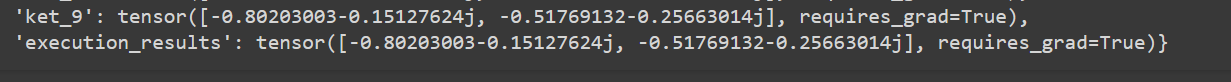

In [ ]:
def plot_pulses(self, verbose = 1, key_show = 'all'):
  resultado = self.pulse_type
  # creo tiempo
  t_end = self.global_time
  time = np.linspace(0,t_end,1000)
  for key in resultado:
    list_pulses = resultado[key]
    if list_pulses[0]['Type_pulse'] == 'Unitary':
      B0_pulses = np.zeros(len(time))
      B1_pulses =  np.zeros(len(time))

      for dict_pulse in list_pulses:
        # Crear datos para B0:
        args1 = {"t_init":dict_pulse['t_i'], "t_final":dict_pulse['t_f']}
        B0_i = dict_pulse['B0'] * pulse_x(
                                        time,
                                        args1)
        B0_pulses += B0_i
        # Crear datos para B1:
        args2 = {"t_init":dict_pulse['t_i'], "t_final":dict_pulse['t_f']}
        B1_i = dict_pulse['B1'] * pulse_x(
                                        time,
                                        args2)
        B1_pulses += B1_i
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, B0_pulses)
      plt.show()
      plt.figure(figsize=(8,3))
      plt.plot(time, B1_pulses)
      plt.show()

    elif list_pulses[0]['Type_pulse'] == "Two_Qubits":
      Interaction = np.zeros(len(time))
      for dict_pulse in list_pulses:
        # Crear datos para B0:
        args1 = {"t_init":dict_pulse['t_i'], "t_final":dict_pulse['t_f']}
        Interaction_i = dict_pulse["J"] * pulse_x(
                                          time,
                                          args1)
        Interaction += Interaction_i
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, Interaction)
      plt.show()

In [ ]:
def plot_pulses(self, verbose = 1, key_show = 'all'):
  resultado = self.pulse_type
  for key in resultado:
    list_pulses = resultado[key]
    if list_pulses[0]['Type_pulse'] == 'Unitary':
      time = []
      B0_pulses = []
      B1_pulses = []
      t0 = 0
      for dict_pulse in list_pulses:
        # Crear tiempo:
        time_i = np.linspace(t0, t0 + dict_pulse['Delt_t'], 100)
        time += list(time_i)
        t0 = time[-1]
        # Crear datos para B0:
        args1 = {"t_init":0, "t_final":dict_pulse['Delt_t']}
        B0_i = dict_pulse['B0'] * pulse_x(
                                        np.linspace(0,dict_pulse['Delt_t'], 100),
                                        args1)
        B0_pulses += list(B0_i)
        # Crear datos para B1:
        args2= {"t_init":0, "t_final":dict_pulse['Delt_t']}
        B1_i = dict_pulse['B1'] * pulse_x(
                                        np.linspace(0,dict_pulse['Delt_t'],100),
                                        args2)
        B1_pulses += list(B1_i)
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, B0_pulses)
      plt.show()
      plt.figure(figsize=(8,3))
      plt.plot(time, B1_pulses)
      plt.show()

    elif list_pulses[0]['Type_pulse'] == "Two_Qubits":
      time = []
      Interaction = []
      t0 = 0
      for dict_pulse in list_pulses:
        # Crear tiempo:
        time_i = np.linspace(t0, t0 + dict_pulse['Delt_t'], 100)
        time += list(time_i)
        t0 = time[-1]
        # Crear datos para B0:
        args1 = {"t_init":0, "t_final":dict_pulse['Delt_t']}
        Interaction_i = dict_pulse["J"] * pulse_x(
                                          np.linspace(0,dict_pulse['Delt_t'], 100),
                                          args1)
        Interaction += list(Interaction_i)
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, Interaction)
      plt.show()


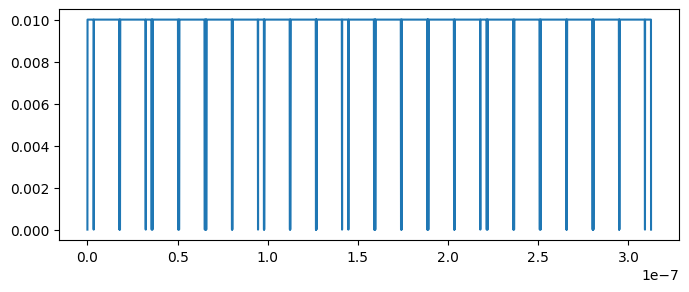

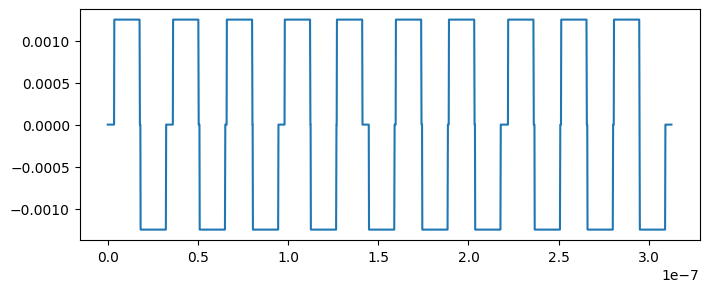

In [ ]:
plot_pulses(dru_circuit)

# Pruebas a dos qubits

## Pruebas 2 qubits - sin entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]

In [ ]:
params.shape

(20, 3)

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 2,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0)))
#  qcircuit_DRU_2_Qubit(self, params, x, bias=None, entanglement=False)
state_dru = dru_circuit.qcircuit_DRU_2_Qubit(params, x, bias=bias)

N_layers = 10
params_shape = (20, 3)
params_shape = (20, 3)


In [ ]:
state_dru

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[-0.37171685+0.08238483j]
 [ 0.41473176-0.44697219j]
 [-0.19999215-0.30914036j]
 [ 0.54494772+0.22521127j]]

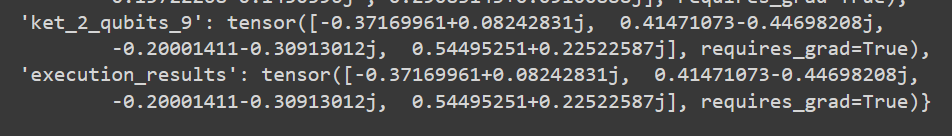

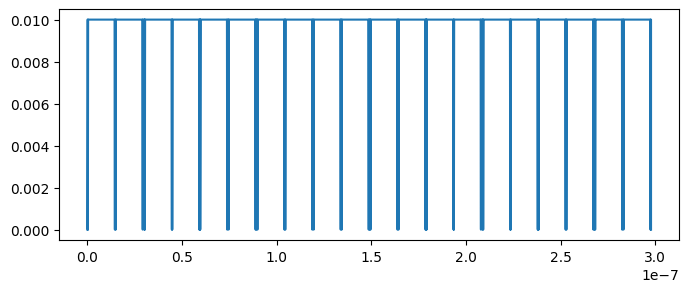

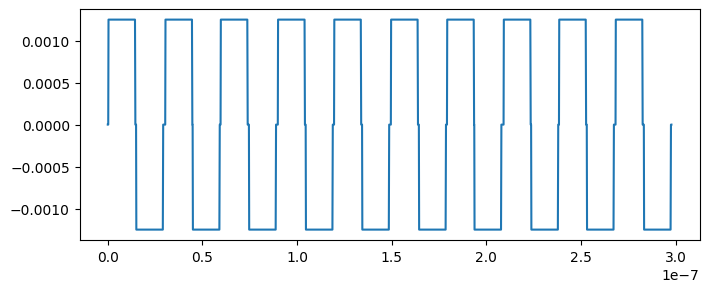

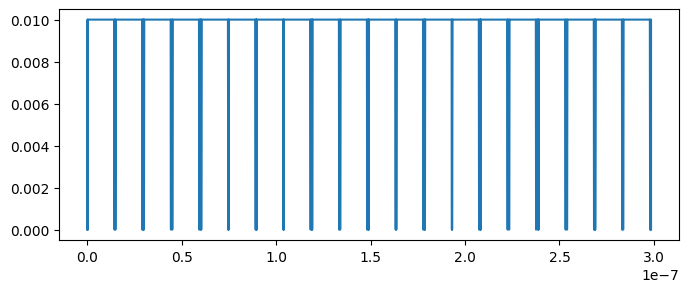

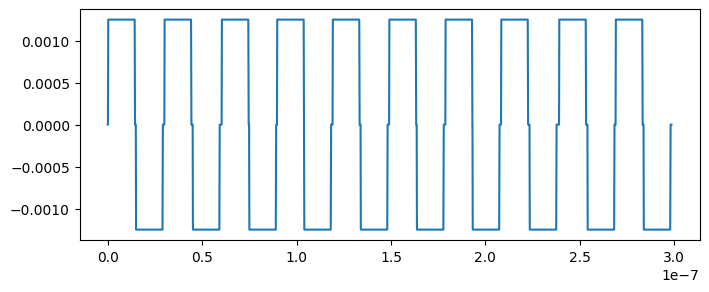

In [ ]:
plot_pulses(dru_circuit)

## Pruebas 2 qubits - con entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 2,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0)))
#  qcircuit_DRU_2_Qubit(self, params, x, bias=None, entanglement=False)
state_dru = dru_circuit.qcircuit_DRU_2_Qubit(params, x, bias=bias, entanglement=True)

N_layers = 10
params_shape = (20, 3)
params_shape = (20, 3)


In [ ]:
state_dru

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.12054176-0.2939897j ]
 [-0.30146138+0.39686499j]
 [ 0.14102325-0.18171718j]
 [-0.30753566-0.70934624j]]

In [ ]:
state_dru.full()*-1j

array([[-0.2939897 -0.12054176j],
       [ 0.39686499+0.30146138j],
       [-0.18171718-0.14102325j],
       [-0.70934624+0.30753566j]])

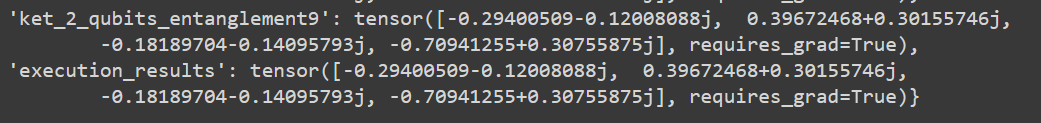

In [ ]:
dru_circuit.pulse_type

defaultdict(list,
            {0: [{'Type_pulse': 'Unitary',
               'B0': 0.01,
               'B1': 0,
               'Delt_t': 2.42120057712624e-10,
               't_i': 0,
               't_f': 2.42120057712624e-10,
               'Noise': ''},
              {'Type_pulse': 'Unitary',
               'B0': 0.01,
               'B1': 0.00125,
               'Delt_t': 1.4279966607226333e-08,
               't_i': 2.42120057712624e-10,
               't_f': 1.4522086664938958e-08,
               'Noise': ''},
              {'Type_pulse': 'Unitary',
               'B0': 0.01,
               'B1': 0,
               'Delt_t': 4.242648778288943e-10,
               't_i': 1.4522086664938958e-08,
               't_f': 1.4946351542767853e-08,
               'Noise': ''},
              {'Type_pulse': 'Unitary',
               'B0': 0.01,
               'B1': -0.00125,
               'Delt_t': 1.4279966607226333e-08,
               't_i': 1.4946351542767853e-08,
               't_f': 2.9

In [ ]:
def plot_pulses_2(self, verbose = 1, key_show = 'all'):
  resultado = self.pulse_type
  # creo tiempo
  t_end = self.global_time
  time = np.linspace(0,t_end,1000)
  for key in resultado:
    print(f"Entro con key = {key}")
    list_pulses = resultado[key]
    if list_pulses[0]['Type_pulse'] == 'Unitary':
      B0_pulses = np.zeros(len(time))
      B1_pulses =  np.zeros(len(time))
      print("Llegue a B0_1")
      print(list_pulses)
      for dict_pulse in list_pulses:
        print(dict_pulse)
        # Crear datos para B0:
        args1 = {"t_init":dict_pulse['t_i'], "t_final":dict_pulse['t_f']}
        B0_i = dict_pulse['B0'] * pulse_x(
                                        time,
                                        args1)
        B0_pulses += B0_i
        # Crear datos para B1:
        args2 = {"t_init":dict_pulse['t_i'], "t_final":dict_pulse['t_f']}
        B1_i = dict_pulse['B1'] * pulse_x(
                                        time,
                                        args2)
        B1_pulses += B1_i
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, B0_pulses)
      plt.show()
      plt.figure(figsize=(8,3))
      plt.plot(time, B1_pulses)
      plt.show()

    elif list_pulses[0]['Type_pulse'] == "Two_Qubits":
      Interaction = np.zeros(len(time))
      print(f"key = {key}")
      for dict_pulse in list_pulses:
        # Crear datos para B0:
        args1 = {"t_init":dict_pulse['t_i'], "t_final":dict_pulse['t_f']}
        Interaction_i = dict_pulse["J"] * pulse_x(
                                          time,
                                          args1)
        Interaction += Interaction_i
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, Interaction)
      plt.show()

Entro con key = 0
Llegue a B0_1
[{'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 2.42120057712624e-10, 't_i': 0, 't_f': 2.42120057712624e-10, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0.00125, 'Delt_t': 1.4279966607226333e-08, 't_i': 2.42120057712624e-10, 't_f': 1.4522086664938958e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 4.242648778288943e-10, 't_i': 1.4522086664938958e-08, 't_f': 1.4946351542767853e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': -0.00125, 'Delt_t': 1.4279966607226333e-08, 't_i': 1.4946351542767853e-08, 't_f': 2.9226318149994184e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 8.867792335018945e-10, 't_i': 2.9226318149994184e-08, 't_f': 3.011309738349608e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 1.7849958259032916e-09, 't_i': 1.5707963864933205, 't_f': 1.5707963882783165, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'De

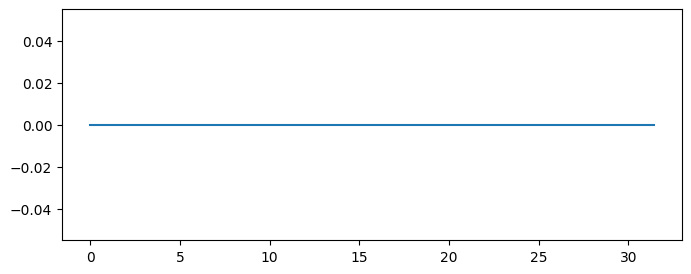

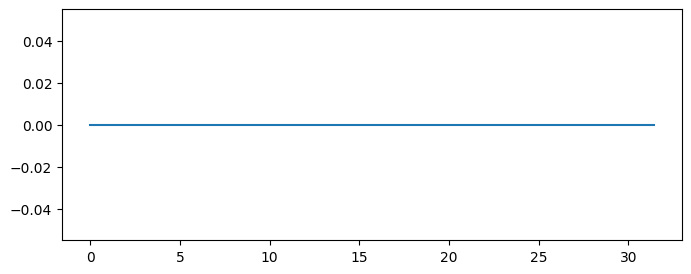

Entro con key = 1
Llegue a B0_1
[{'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 1.0247086995934405e-10, 't_i': 3.011309738349608e-08, 't_f': 3.0215568253455424e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0.00125, 'Delt_t': 1.4279966607226333e-08, 't_i': 3.0215568253455424e-08, 't_f': 4.449553486068176e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 4.536970733333186e-10, 't_i': 4.449553486068176e-08, 't_f': 4.494923193401508e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': -0.00125, 'Delt_t': 1.4279966607226333e-08, 't_i': 4.494923193401508e-08, 't_f': 5.922919854124141e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 4.692253645466915e-10, 't_i': 5.922919854124141e-08, 't_f': 5.96984239057881e-08, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 0.01, 'B1': 0, 'Delt_t': 2.6774937388549373e-09, 't_i': 3.1415927159657113, 't_f': 3.141592718643205, 'Noise': ''}, {'Type_pulse': 'Unitary', 'B0': 

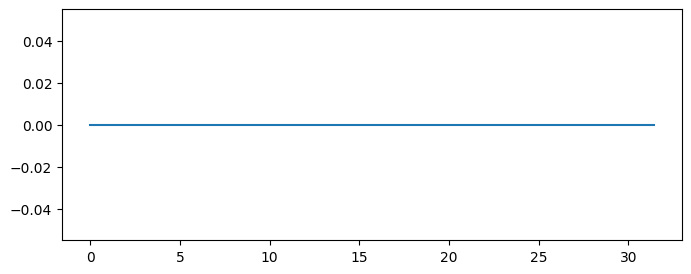

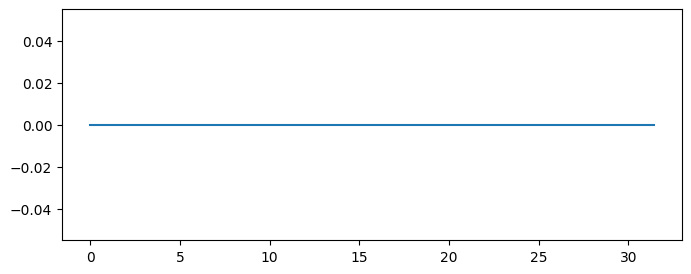

Entro con key = I_0-1
key = I_0-1


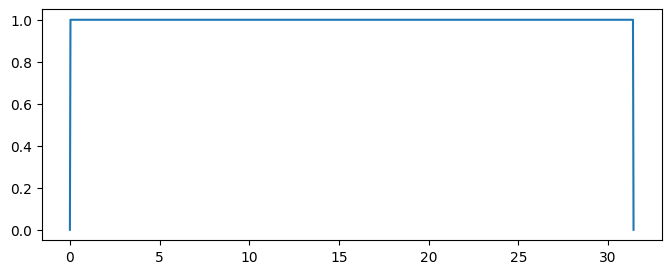

In [ ]:
plot_pulses_2(dru_circuit)

## Pruebas 4 qubits - sin entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))
#  qcircuit_DRU_2_Qubit(self, params, x, bias=None, entanglement=False)
state_dru = dru_circuit.qcircuit_DRU_4_Qubit(params, x, bias=bias, entanglement=False)

Contador general 0
Contador general 1
Contador general 2
Contador general 3
Contador general 4


In [ ]:
state_dru.full()

array([[-0.45275368-0.20165885j],
       [ 0.12855649-0.22739869j],
       [-0.30923051-0.24149783j],
       [ 0.14224376-0.15009754j],
       [-0.19748516-0.40609954j],
       [ 0.22298442-0.08319737j],
       [-0.07403956-0.3497263j ],
       [ 0.18720362-0.02126582j],
       [ 0.04361474-0.12381905j],
       [ 0.06276877+0.02910589j],
       [ 0.05718391-0.08677434j],
       [ 0.04265142+0.03436287j],
       [ 0.1030162 -0.06077174j],
       [ 0.02670557+0.05710155j],
       [ 0.09075746-0.02698229j],
       [ 0.00959429+0.04897167j]])

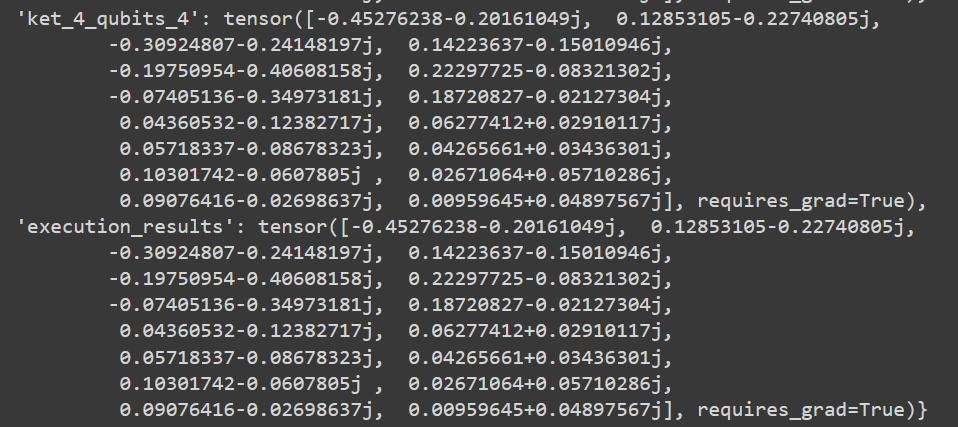

## Pruebas 4 qubits - con entrelazamiento

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(2*num_layers, 3), requires_grad=True)
x = [0.1, 0.5, 1]

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri = 100,
                                     N_qubits = 4,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)))
#  qcircuit_DRU_2_Qubit(self, params, x, bias=None, entanglement=False)
state_dru = dru_circuit.qcircuit_DRU_4_Qubit(params, x, bias=bias, entanglement=True)

Contador general 0
Entro par en 0
Contador general 1
Entro impar en 1
[0, 3]
Contador general 2
Entro par en 2
Contador general 3
Entro impar en 3
[0, 3]
Contador general 4


In [ ]:
state_dru.full()

array([[ 5.30666671e-01-0.05573252j],
       [ 2.52928722e-02+0.12374866j],
       [ 1.20095629e-01+0.25809097j],
       [-3.26820791e-04+0.04962777j],
       [ 1.29431665e-01+0.41910408j],
       [-2.30984167e-01-0.18162398j],
       [-1.50793016e-01-0.12755817j],
       [-2.18477339e-01+0.18760228j],
       [ 8.29905412e-02+0.06622924j],
       [-1.33844799e-01-0.19166045j],
       [ 8.96256874e-04-0.10212296j],
       [-2.30590829e-01-0.1338044j ],
       [-9.96286335e-02+0.02408182j],
       [-9.85993745e-02-0.08995478j],
       [-1.46768718e-01+0.13285635j],
       [ 9.66704095e-03-0.01121077j]])

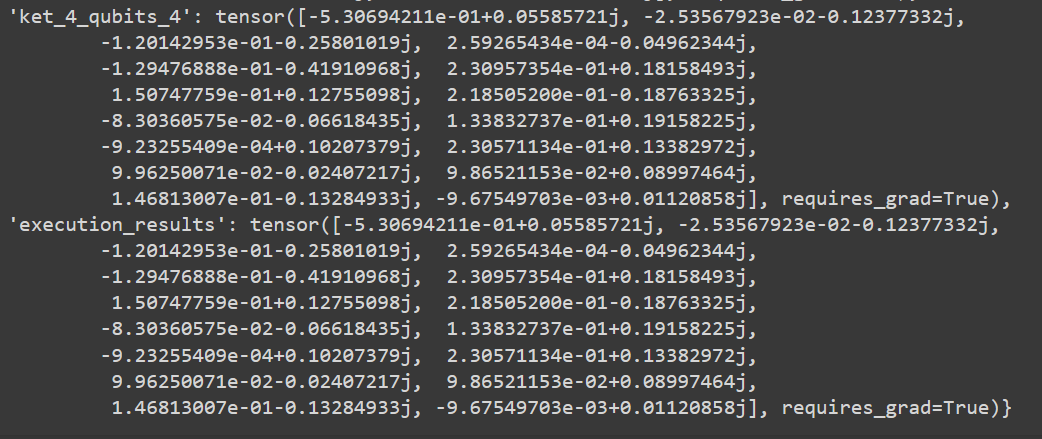

# Pruebas de Fidelidad y Entrelazamiento

## Pruebas a 1 solo qubit

### Cargar datos pruebas 1 qubit


In [ ]:
import json

def w_r_json(write_or_read, path, file = []):

  if write_or_read == 'w':
    list_new = []
    for dict_i in file:
      json_errors = {k: [v.numpy().real.tolist(), v.numpy().imag.tolist()] for k, v in dict_i.items()}
      list_new.append(json_errors)
    # Escribir la lista de diccionarios en un archivo JSON
    with open(path, 'w') as archivo_json:
        json.dump(list_new, archivo_json)

  elif write_or_read == 'r':
    with open(path, 'r') as archivo_json:
        lista_recuperada = json.load(archivo_json)
    list_new = []
    for dict_i in lista_recuperada:
      json_errors = {k: np.array(v[0]) + 1j * np.array(v[1])  for k, v in dict_i.items()}
      list_new.append(json_errors)
    return lista_recuperada, list_new

def test_intra_states(model, params, x, y, state_labels=None, bias=None, entanglement = False):
  dict_states_by_sample = []
  for i in range(len(x)):
    diccionario_estados = qml.snapshots(model)(params,x[i], bias=bias, entanglement = entanglement)
    dict_states_by_sample.append(diccionario_estados)
  return dict_states_by_sample

In [ ]:
# leer datos baseline:
path_before = "/content/drive/MyDrive/Tesis/1_qubit_iris_3_3_before.json"
abefore, dict_samples_before_1_qubit = w_r_json('r', path_before)

path_after = "/content/drive/MyDrive/Tesis/1_qubit_iris_3_3_after.json"
dict_samples_after_1_qubit = w_r_json('r', path_after)

In [ ]:
len(dict_samples_before_1_qubit)

105

In [ ]:
dict_samples_before_1_qubit[0]
# 'ket_1_qubit_0'

{'ket_1_qubit_0': tensor([0.91596724+0.30124646j, 0.26173364-0.04183407j], requires_grad=True),
 'ket_1_qubit_1': tensor([0.67147391-0.39437603j, 0.55770115+0.28733214j], requires_grad=True),
 'ket_1_qubit_2': tensor([0.61083621-0.46871904j, 0.6094426 +0.18910659j], requires_grad=True),
 'ket_1_qubit_3': tensor([0.43459178-0.58280102j, 0.65656169+0.20099675j], requires_grad=True),
 'ket_1_qubit_4': tensor([0.15564561-0.71603006j, 0.45098113+0.50959926j], requires_grad=True),
 'ket_1_qubit_5': tensor([-0.13066032-0.87057631j,  0.32561532+0.34496294j], requires_grad=True),
 'ket_1_qubit_6': tensor([-0.47394592-0.83995381j,  0.06244842+0.25681327j], requires_grad=True),
 'ket_1_qubit_7': tensor([-0.87963452-0.35570275j, -0.30258097-0.09035164j], requires_grad=True),
 'ket_1_qubit_8': tensor([-0.82428797-0.15264755j, -0.47121037-0.27424232j], requires_grad=True),
 'ket_1_qubit_9': tensor([-0.80203003-0.15127625j, -0.51769131-0.25663014j], requires_grad=True),
 'execution_results': tensor([

In [ ]:
# Preparar IRIS 3-3

In [ ]:
X, y =  make_IRIS_v2(3,3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
len(X_test)

45

In [ ]:
X_train[7], X_train[0]

(array([ 0.66028376, -0.35296967,  0.32802753]),
 array([-0.18962247, -0.68028676, -0.30642056]))

In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(num_layers, 3), requires_grad=True)

In [ ]:
params[0]

tensor([0.37454012, 0.95071431, 0.73199394], requires_grad=True)

In [ ]:
mm = [[-0.18962247, -0.68028676, -0.30642056]]

In [ ]:
#dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
list_dict_states_spin_dru = []
for xi in X_train:
  print(xi)
  dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
  state_dru = dru_circuit_1_q.qcircuit_DRU_1_Qubit(params, xi, bias=bias)
  list_dict_states_spin_dru.append(dru_circuit_1_q.dict_states)

[-0.18962247 -0.68028676 -0.30642056]
[ 1.44416124 -0.14341341 -0.15323389]
[1.90509815 0.04930053 0.16218024]
[ 0.90017437  0.32850447 -0.31620907]
[2.91675097 0.78279195 0.42333542]
[ 0.37621565 -0.29321893  0.07799635]
[ 3.39703874  0.55083667 -0.34843756]
[ 0.66028376 -0.35296967  0.32802753]
[-2.68412563  0.31939725 -0.02791483]
[ 3.49992004  0.4606741  -0.57318224]
[ 0.23610499 -0.33361077 -0.27116184]
[-2.63953472  0.31203998 -0.1459089 ]
[-2.77010243  0.26352753  0.07724769]
[-2.20948924  0.43666314  0.29874275]
[-0.50784088 -1.26597119 -0.26981718]
[ 1.38876613 -0.20439933 -0.06452276]
[-2.35575405 -0.03728186  0.12502108]
[-2.50666891 -0.14601688 -0.25342004]
[-2.30273318  0.09870885  0.03912326]
[ 0.35698149 -0.50491009  0.01661717]
[-2.59000631  0.22904384 -0.0800823 ]
[ 0.33193448 -0.21265468  0.08320429]
[3.48705536 1.17573933 0.13389487]
[-2.83946217 -0.22794557  0.08372685]
[ 0.64257601  0.01773819 -0.20539497]
[ 1.34616358 -0.77681835  0.28190288]
[-2.59873675  1.09314

In [ ]:
dru_circuit_1_q.dict_states

{'ket_1_qubit_0': array([[-0.68093962+0.16713569j],
        [-0.68963564-0.18107894j]]),
 'ket_1_qubit_1': array([[ 0.58242044+0.29323601j],
        [-0.74902557-0.11730206j]]),
 'ket_1_qubit_2': array([[ 0.80017602+0.01966513j],
        [-0.44416212-0.40255637j]]),
 'ket_1_qubit_3': array([[0.67466154+0.33961817j],
        [0.59099517-0.28322431j]]),
 'ket_1_qubit_4': array([[-0.0654072 +0.37928934j],
        [ 0.74129391+0.54985892j]]),
 'ket_1_qubit_5': array([[-0.30804622+0.00585634j],
        [ 0.33709961+0.8896275j ]]),
 'ket_1_qubit_6': array([[-0.20660528-0.58801395j],
        [-0.36269599+0.69282427j]]),
 'ket_1_qubit_7': array([[-0.3431863 -0.53837608j],
        [-0.73337666-0.23352311j]]),
 'ket_1_qubit_8': array([[ 0.21000357-0.29710105j],
        [-0.28709162-0.88611956j]]),
 'ket_1_qubit_9': array([[0.26266436+0.37722876j],
        [0.11964054-0.87999548j]])}

In [ ]:
dict_samples_before_1_qubit[0]

{'ket_1_qubit_0': tensor([0.91596724+0.30124646j, 0.26173364-0.04183407j], requires_grad=True),
 'ket_1_qubit_1': tensor([0.67147391-0.39437603j, 0.55770115+0.28733214j], requires_grad=True),
 'ket_1_qubit_2': tensor([0.61083621-0.46871904j, 0.6094426 +0.18910659j], requires_grad=True),
 'ket_1_qubit_3': tensor([0.43459178-0.58280102j, 0.65656169+0.20099675j], requires_grad=True),
 'ket_1_qubit_4': tensor([0.15564561-0.71603006j, 0.45098113+0.50959926j], requires_grad=True),
 'ket_1_qubit_5': tensor([-0.13066032-0.87057631j,  0.32561532+0.34496294j], requires_grad=True),
 'ket_1_qubit_6': tensor([-0.47394592-0.83995381j,  0.06244842+0.25681327j], requires_grad=True),
 'ket_1_qubit_7': tensor([-0.87963452-0.35570275j, -0.30258097-0.09035164j], requires_grad=True),
 'ket_1_qubit_8': tensor([-0.82428797-0.15264755j, -0.47121037-0.27424232j], requires_grad=True),
 'ket_1_qubit_9': tensor([-0.80203003-0.15127625j, -0.51769131-0.25663014j], requires_grad=True),
 'execution_results': tensor([

In [ ]:
list_dict_states_spin_dru[-1]

{'ket_1_qubit_0': array([[-0.68093962+0.16713569j],
        [-0.68963564-0.18107894j]]),
 'ket_1_qubit_1': array([[ 0.58242044+0.29323601j],
        [-0.74902557-0.11730206j]]),
 'ket_1_qubit_2': array([[ 0.80017602+0.01966513j],
        [-0.44416212-0.40255637j]]),
 'ket_1_qubit_3': array([[0.67466154+0.33961817j],
        [0.59099517-0.28322431j]]),
 'ket_1_qubit_4': array([[-0.0654072 +0.37928934j],
        [ 0.74129391+0.54985892j]]),
 'ket_1_qubit_5': array([[-0.30804622+0.00585634j],
        [ 0.33709961+0.8896275j ]]),
 'ket_1_qubit_6': array([[-0.20660528-0.58801395j],
        [-0.36269599+0.69282427j]]),
 'ket_1_qubit_7': array([[-0.3431863 -0.53837608j],
        [-0.73337666-0.23352311j]]),
 'ket_1_qubit_8': array([[ 0.21000357-0.29710105j],
        [-0.28709162-0.88611956j]]),
 'ket_1_qubit_9': array([[0.26266436+0.37722876j],
        [0.11964054-0.87999548j]])}

In [ ]:
N_states_bl = len(dict_samples_before_1_qubit)
N_states_spin = len(list_dict_states_spin_dru)
print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
dict_states_fidelities = []
for i in range(N_states_bl):
  dict_bl = dict_samples_before_1_qubit[i]
  dict_spin = list_dict_states_spin_dru[i]
  Fidelities_by_state = {}
  try:
    for key in dict_bl:

      state_spin = dict_spin[key]
      state_bl_i = dict_bl[key].numpy()

      state_bl_i  = Qobj(state_bl_i)
      state_spin  = Qobj(state_spin)

      F = fidelity(state_spin, state_bl_i)

      Fidelities_by_state[key] = F
  except:
    print(f"Error en key = {key}")
  dict_states_fidelities.append(Fidelities_by_state)

N sates base line 105 
 N sates spin 105
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Er

In [ ]:
dict_states_fidelities

[{'ket_1_qubit_0': 0.9999999999621088,
  'ket_1_qubit_1': 0.9999999999461416,
  'ket_1_qubit_2': 0.9999999995153761,
  'ket_1_qubit_3': 0.9999999993471526,
  'ket_1_qubit_4': 0.9999999991526266,
  'ket_1_qubit_5': 0.9999999991417509,
  'ket_1_qubit_6': 0.9999999984342685,
  'ket_1_qubit_7': 0.9999999978908602,
  'ket_1_qubit_8': 0.9999999973721324,
  'ket_1_qubit_9': 0.9999999962860783},
 {'ket_1_qubit_0': 0.9999999999967875,
  'ket_1_qubit_1': 0.9999999998960649,
  'ket_1_qubit_2': 0.9999999994298288,
  'ket_1_qubit_3': 0.9999999994334917,
  'ket_1_qubit_4': 0.9999999993430839,
  'ket_1_qubit_5': 0.9999999992693351,
  'ket_1_qubit_6': 0.9999999992101846,
  'ket_1_qubit_7': 0.9999999991927071,
  'ket_1_qubit_8': 0.9999999991546253,
  'ket_1_qubit_9': 0.9999999990699938},
 {'ket_1_qubit_0': 0.9999999999933623,
  'ket_1_qubit_1': 0.9999999998952828,
  'ket_1_qubit_2': 0.9999999998178218,
  'ket_1_qubit_3': 0.9999999998694901,
  'ket_1_qubit_4': 0.9999999998573719,
  'ket_1_qubit_5': 0.99

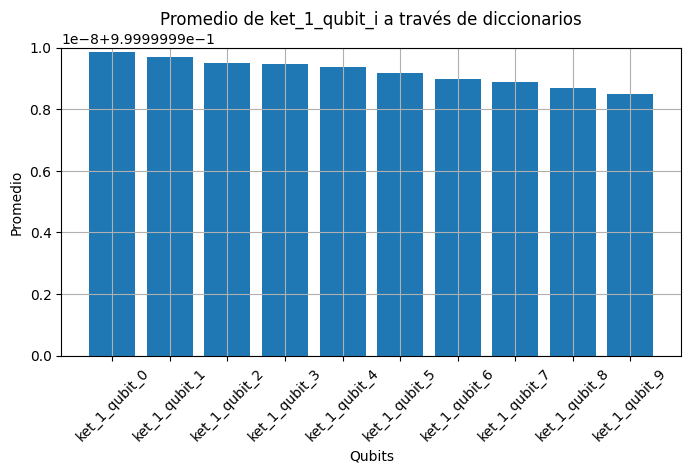

In [ ]:
# Organizar los datos para facilitar el cálculo del promedio
ket_labels = [f'ket_1_qubit_{i}' for i in range(len(dict_states_fidelities[0]))]
promedios = {ket: [] for ket in ket_labels}

for diccionario in dict_states_fidelities:
    for ket, valor in diccionario.items():
        promedios[ket].append(valor)

# Calcular el promedio para cada 'ket_1_qubit_i'
promedios = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}

# Crear el diagrama de barras
plt.figure(figsize=(8, 4))
plt.grid()
plt.bar(promedios.keys(), promedios.values())
plt.xlabel('Qubits')
plt.ylabel('Promedio')
plt.title('Promedio de ket_1_qubit_i a través de diccionarios')
plt.ylim(0.99999999, 1.0)
plt.xticks(rotation=45)

plt.show()

In [ ]:
state_spin

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.26266436+0.37722876j]
 [0.11964054-0.87999548j]]

In [ ]:
state_bl_i = dict_bl[key].numpy()
state_bl_i

array([-0.26267172-0.37720718j, -0.11965797+0.88000016j])

In [ ]:
qutip_qobj_sparse = Qobj(state_spin)
qutip_qobj_sparse

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.26266436+0.37722876j]
 [0.11964054-0.87999548j]]

In [ ]:
qutip_qobj_sparse = Qobj(state_bl_i)
qutip_qobj_sparse

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.26267172-0.37720718j]
 [-0.11965797+0.88000016j]]

# Grafica de pulsos